# Выявление профилей потребления


<b>Цель исследования</b> — провести комплексный анализ данных и составить рекомендации, которые позволят увеличить продажи и лояльность клиентов с помощью сегментированного маркетинга:
- разработать рекомендации о том, каким клиентам и когда следует рассылать рекламные предложения и о каких товарах
- разработать стратегию по увеличению количества продаваемого товара для каждого сегмента покупателей
- предложить способы повышения возвращаемости покупателей для различных сегментов

<b>Задачи</b>:
1. Провести исследовательский анализ данных
2. Сегментировать покупателей на основе истории их покупок
3. Проверить статистические гипотезы:
- средние чеки у постоянных и ушедших клиентов одинаковые
- средняя выручка с покупателя (ARPU) для постоянных и неактивных клиентов одинакова

<b>Исходные данные</b>: данные о покупках пользователей за период с 1 октября 2018 по 31 января 2020.

## Общая информация 

Датасет описывает транзакции интернет-магазина.
Содержимое колонок:
- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

Загрузим данные и изучим их подробнее.

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st

In [2]:
#настройка стилей seaborn
sns.set_style('whitegrid')
sns.set_palette('muted')

In [3]:
data = pd.read_csv('ecom_dataset_upd.csv')
#вывод первых пяти строк таблицы
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Видим, что дата заказа представлена в виде целого числа — потребуется изменить тип данных. 

In [4]:
#вывод общей информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


Типы данных в остальных столбцах выглядят корректно. Судя по общей информации, пропусков в таблице нет.

## Предобработка данных

### Изменение типов данных

Исправим тип данных в столбце `date`, оставив только дату. 

In [5]:
#изменение типа данных в столбце с датой
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H').dt.date
data.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018-10-01,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018-10-01,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018-10-01,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


Теперь данные выглядят корректно.

### Обработка дубликатов

Перед удалением дубликатов сохраним исходное количество строк в таблице в переменную, чтобы отслеживать количество отсекаемых при предобработке данных.

In [6]:
#сохранение исходного количества строк в переменную
orig_len = len(data)

#### Неявные дубликаты

Неявные дубликаты могли образоваться в столбце с названием товара. Приведем значения в `product` к нижнему регистру и подсчитаем количество уникальных значений в столбце.

In [7]:
#приведение названий к нижнему регистру
data['product'] = data['product'].str.lower().str.replace('ё', 'е')
#вывод количества уникальных значений
print('Уникальных значений в столбце product:', len(data['product'].sort_values().unique()))
#вывод первых десяти строк списка уникальных значений
with pd.option_context("display.max_colwidth", 100):
    display(pd.Series(data['product'].sort_values().unique()).head(10))

Уникальных значений в столбце product: 2341


0                     tepмокружка avex freeflow 700 мл зеленый avex0759
1                       tepмокружка avex freeflow 700 мл сталь avex0776
2                     tepмокружка avex recharge 500 мл голубой avex0681
3    автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114
4                 агератум рассада однолетних цветов в кассете по 10 шт
5                                                 адиантум лиза d-12 см
6                                         азалия индика биколор d-12 см
7                                    азалия индика биколор d-12 см h-20
8                                    азалия индика розовая d-12 см h-20
9                                 азалия индика фиолетовая d-10 см h-20
dtype: object

Уникальных значений много, при этом есть достаточно похожие названия товаров, которые по факту не являются дубликатами. Далее мы будем работать с категориями товаров, поэтому искать дубликаты среди названий товаров нет необходимости.

#### Явные дубликаты

Проверим, есть ли в таблице полные дубликаты.

In [8]:
print('Полных дубликатов в таблице:', data.duplicated().sum()) #проверка на явные дубликаты

Полных дубликатов в таблице: 966


Удалим полные дубликаты.

In [9]:
data = data.drop_duplicates().reset_index(drop=True) #удаление дубликатов и обновление индексации

Проверим, все ли в порядке с соответствием id пользователя номеру заказа. Если процесс формирования номера заказа корректен, одному номеру заказа может соответствовать только один id пользователя.

In [10]:
#подсчет количества пользователей на заказ
users_by_order = data.groupby('order_id')['customer_id'].nunique().reset_index()
#вывод количества заказов, на которые приходится больше одного пользователя
print('Количество некорректных заказов =', len(users_by_order[users_by_order['customer_id'] > 1]))

Количество некорректных заказов = 29


Удалим некорректные заказы из таблицы.

In [11]:
#сохранение номеров некорректных заказов в переменную
wrong_orders = users_by_order[users_by_order['customer_id'] > 1]['order_id']
#удаление некорректных заказов и обновление индексации
data = data.query('order_id not in @wrong_orders').reset_index(drop=True)

Теперь проверим дубли без учета даты заказа. 

In [12]:
#подсчет дубликатов без учета даты
data.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']).sum()

877

Дублей достаточно много — посмотрим, что из себя представляют заказы с содержанием этих дублей.

In [13]:
dupl = data[data.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']) == True]
dupl_orders = dupl['order_id']
with pd.option_context("display.max_colwidth", 100):
    display(data.query('order_id in @dupl_orders').sort_values(by=['order_id', 'date']).head(40))

,date,customer_id,order_id,product,quantity,price
99,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315.0
100,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207.0
101,2018-10-05,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162.0
366,2018-10-23,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315.0
367,2018-10-23,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207.0
368,2018-10-23,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162.0
490,2018-10-28,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315.0
491,2018-10-28,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете по 6 шт,1,207.0
492,2018-10-28,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни тимьяна в кассете по 6 шт,1,162.0
559,2018-11-02,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по 6 шт,1,315.0


Судя по заказам 13547 и 14500 можно предположить, что товары могли дублироваться при изменении заказа. Сохраним только последние данные, а дубликаты за более ранние даты удалим.

In [14]:
#удаление дубликатов
data = data.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'], keep='last')
#проверка с подсчетом дубликатов
data.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']).sum()

0

Проверим, какую часть данных пришлось отсечь в процессе предобработки.

In [15]:
print('До:', orig_len)
print('После:', len(data))
print('Удалено', round((1 - len(data)/orig_len) * 100, 2), '% данных')

До: 7474
После: 5544
Удалено 25.82 % данных


Пришлось пожертвовоать достаточно весомой частью данных. Удаленные дубликаты могли бы исказить исследование.

### Добавление столбца с выручкой

Далее нам понадобится столбец, в котором будет отражена выручка за товар, равная произведению его стоимости на количество. Добавим его в таблицу:

In [16]:
#вычисление произведения стоимости товара на количество
data['revenue'] = data['quantity'] * data['price']
#вывод нескольких строк для проверки
data.tail(10)

,date,customer_id,order_id,product,quantity,price,revenue
6411,2020-01-29,28437f82-c2a8-41ea-a7c1-bcedece59d8b,102658,"гладильная доска ника 3+ 122х34,5 см н3+",1,1124.0,1124.0
6412,2020-01-29,0b2157e5-101e-4e0e-bfaf-7340ed23e574,111547,"коврик придверный, полипропилен, 40х70 см, kok...",1,749.0,749.0
6413,2020-01-29,904015ba-31f2-4ce4-b68e-02362280a43d,107214,ящик почтовый металлический с ушками для навес...,1,172.0,172.0
6414,2020-01-29,4228e34b-dcba-4df8-ae70-b282e84a1edb,110547,tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.0,2399.0
6415,2020-01-30,370ed405-57f6-4eff-ab2e-a0bacab6e982,102891,пеларгония зональная ринго вайт d-7 см h-10 см...,1,74.0,74.0
6416,2020-01-30,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,76.0
6417,2020-01-30,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,869.0
6418,2020-01-31,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,354.0
6419,2020-01-31,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0
6420,2020-01-31,2e460a26-35af-453d-a369-a036e95a40e0,103225,вешалка для блузок 41 см красный attribute ahm781,1,104.0,104.0


### Добавление столбца с месяцем и годом

Для анализа динамики показателей по месяцам потребуется столбец с годом и месяцем. Добавим его:

In [17]:
#функция для получения первого дня месяца
def get_month(full_date):
    month = date(pd.to_datetime(full_date).year, pd.to_datetime(full_date).month, 1)
    return month

In [18]:
#создание столбца, содержащего первый день месяца
data['month'] = data['date'].apply(get_month)
#вывод нескольких строк для проверки
data.tail()

,date,customer_id,order_id,product,quantity,price,revenue,month
6416,2020-01-30,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) черниченский черри № 116 сорт...,2,38.0,76.0,2020-01-01
6417,2020-01-30,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,дендробиум санок анна грин 1 ствол d-12 см,1,869.0,869.0,2020-01-01
6418,2020-01-31,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,подставка для обуви резиновая attribute 80x40 ...,1,354.0,354.0,2020-01-01
6419,2020-01-31,cdd17932-623e-415f-a577-3b31312fd0e2,102002,тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,2020-01-01
6420,2020-01-31,2e460a26-35af-453d-a369-a036e95a40e0,103225,вешалка для блузок 41 см красный attribute ahm781,1,104.0,104.0,2020-01-01


### Добавление столбца с категорией товара

Для того, чтобы разбить товары на категории, потребуется изучить список уникальных значений в столбце `product`, и на их основе сформировать списки ключевых слов для определения категории товара.

In [19]:
#вывод списка названий товаров
with pd.option_context("display.max_rows", None):
    with pd.option_context("display.max_colwidth", 100):
        display(pd.Series(data['product'].sort_values().unique()))

0                                                         tepмокружка avex freeflow 700 мл зеленый avex0759
1                                                           tepмокружка avex freeflow 700 мл сталь avex0776
2                                                         tepмокружка avex recharge 500 мл голубой avex0681
3                                        автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114
4                                                     агератум рассада однолетних цветов в кассете по 10 шт
5                                                                                     адиантум лиза d-12 см
6                                                                             азалия индика биколор d-12 см
7                                                                        азалия индика биколор d-12 см h-20
8                                                                        азалия индика розовая d-12 см h-20
9                           

Можно выделить следующие категории:
- цветы, растения и горшки
- бытовая химия
- посуда и кухонные принадлежности
- хозтовары
- хранение
- техника
- текстиль
- декор и интерьер
- строительство и ремонт
- мебель
- другое

Поскольку категория "цветы, растения и горшки" содержит множество разных названий растений, предлагаю выделить ключи для всех остальных категорий, а в категорию "цветы, растения и горшки" добавить все, что не вошло в остальные категории. Для этого составим списки ключевых слов, которые позволят охватить все остальные категории.

In [20]:
#список ключевых слов для категории "бытовая химия"
chemicals = ['бальзам для', 'антижир', 'антинакипин', 'средство', 'гель для', 'мыло', 'защитная соль', 'зубная паста',
             'паста зубная', 'кондиционер для белья', 'концентрат', 'ополаскиватель', 'отбеливатель', 'пена для ванн',
             'порошок', 'увлажняющая маска', 'чистящий крем']
#список ключевых слов для категории "посуда и кухонные принадлежности"
kitchenware = ['банка', 'tepмокружка', 'блюд', 'бульонница', 'ваза', 'венчик', 'вилка столовая', 'доска разделочная', 
               'разделочная доска', 'емкость для', 'дуршлаг', 'измельчитель овощей', 'картофелемялка', 'кастрюля', 
               'кисточка силиконовая', 'для сушки посуды', 'ковш', 'кружка', 'кружек', 'крышка', 'кувшин', 
               'кухонные ножницы', 'ложка кухонная', 'ложка столовая', 'столовая ложка', 'ложка чайная', 
               'чайная ложка', 'лопатка', 'лоток', 'мантоварка', 'масленка', 'стакан', 'сковорода', 'сотейник', 
               'миска', 'бокал', 'нож', 'набор посуды', 'набор столовых приборов', 'для кекс', 'фужер', 'салатник', 
               'овощеварка', 'овощечистка', 'орехоколка', 'отделитель косточек', 'подставка для яйца', 'половник', 
               'пресс для чеснока', 'просеиватель', 'противень', 'рыбочистка', 'салфетница', 'сахарница', 'сито', 
               'скалка', 'скребок кондитерский', 'соковарка', 'соковыжималка', 'тарелка', 'терка', 'термокружка', 
               'термос', 'толкушка', 'тортница', 'для выпечки', 'хлебница', 'чайник заварочный', 
               'чайник эмалированный', 'чайный набор', 'шприц кондитерский']
#список ключевых слов для категории "хозтовары"
household = ['щетка', 'прищеп', 'ванна', 'вантуз', 'ведро', 'веник', 'веревка', 'гладильн', 'для глажения', 'губка', 
             'держатель', 'дозатор', 'ерш', 'карниз для ванной', 'швабра', 'махровых салфеток', 
             'комплект для ванной и туалета', 'корыто', 'котел', 'ложка обувная', 'мешок', 'мыльница', 
             'набор ковров для ванной', 'насадка', 'сушилка', 'салфетк', 'окномойка', 'отжим для ведра', 
             'перчатки', 'подголовник', 'подкладка под чехол', 'подрукавник', 'пробка для ванны', 'ролик', 
             'сетка для стирки', 'сиденье', 'сметка', 'совок', 'стакан для ванной', 'сумка', 'таз ', 'тележка', 
             'ткань универсальная', 'ткань для', 'тряпк', 'урна', 'чехол eurogold', 'шнур', 'штанга для ванной', 
             'штора для ванной', 'штора со встроенными кольцами', 'штора текстильная для ванны']
#список ключевых слов для категории "хранение"
storage = ['бак для белья', 'бидон', 'пакет', 'для хранения', 'вешалк', 'вешалок', 'контейнер', 'корзин', 'короб', 
           'кофр', 'плечики', 'подставка для обуви', 'чехол для короткой одежды', 'чехол для костюма', 
           'чехол для одежды', 'чехол для платья', 'ящик для хранения']
#список ключевых слов для категории "техника"
technique = ['весы', 'кипятильник', 'миксер', 'пылесос', 'рассекатель пламени', 'утюг', 'фен', 'чайник электрически', 
             'электроштопор']
#список ключевых слов для категории "текстиль"
textile = ['скатерть', 'постель', 'для штор', 'ковер ', 'коврик', 'полотен', 'халат', 'наволочк', 'наматр', 'одеял', 
           'плед', 'подушка', 'покрывало', 'простын', 'сервировочная салфетка']
#список ключевых слов для категории "декор и интерьер"
interior = ['декоративный', 'декоративная', 'искусственн', 'картина', 'муляж', 'термометр', 'фоторамка']
#список ключевых слов для категории "строительство и ремонт"
construction  = ['завертка', 'угольник', 'крепеж', 'крючок проволочный', 'стремянк', 'линейка', 'инструмент', 
                 'напильник', 'набор сверел', 'насадка на валик', 'основание для пробки', 'паста для полировки', 
                 'петля', 'пружина', 'решетка вентиляционная', 'ручка мебельная', 'ручка-скоба', 'сверло', 
                 'скребок для окон', 'уголок оконный', 'фиксатор', 'сварка', 'шпагат', 'шпингалет', 'штангенциркуль', 
                 'ящик почтовый']
#список ключевых слов для категории "мебель"
furniture = ['пуф', 'комод', 'обувница', 'полка для обуви', 'полки', 'стеллаж', 'стяжка', 'этажерка']
#список ключевых слов для категории "другое"
other = ['бензин ', 'зажигалка', 'светильник', 'крючок одежный', 'шило']

Определять категорию товара будем с помощью функции.

In [21]:
def categorize_product(product):
    '''Функция для категоризации товаров
    
    На вход принимает столбец с названием товара и после проверки наличия в названии товара ключевого слова из списка
    возвращает категорию товара'''
    try:
        if any(item in product for item in chemicals):
            return 'бытовая химия'
        elif any(item in product for item in kitchenware):
            return 'посуда и кухонные принадлежности'
        elif any(item in product for item in household):
            return 'хозтовары'
        elif any(item in product for item in storage):
            return 'хранение'
        elif any(item in product for item in technique):
            return 'техника'
        elif any(item in product for item in textile):
            return 'текстиль'
        elif any(item in product for item in interior):
            return 'декор и интерьер'
        elif any(item in product for item in construction):
            return 'строительство и ремонт'
        elif any(item in product for item in furniture):
            return 'мебель'
        elif any(item in product for item in other):
            return 'другое'
        else:
            return 'цветы, растения и горшки'
    except:
        pass

Применим функцию к столбцу с названиями товаров и создадим столбец с категориями. После выведем несколько строк ьаблицы для проверки правильности определения категории.

In [22]:
#применение функции categorize_product к столбцу с названиями товаров
data['product_category'] = data['product'].apply(categorize_product)
#вывод первых десяти строк таблицы
data.head(10)

,date,customer_id,order_id,product,quantity,price,revenue,month,product_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,"цветы, растения и горшки"
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10-01,"цветы, растения и горшки"
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,"цветы, растения и горшки"
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,2018-10-01,"цветы, растения и горшки"
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,2018-10-01,"цветы, растения и горшки"
5,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0,164.0,2018-10-01,"цветы, растения и горшки"
6,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134.0,134.0,2018-10-01,"цветы, растения и горшки"
7,2018-10-01,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824.0,824.0,2018-10-01,хозтовары
8,2018-10-01,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 21,0 л круглый ""водолей"" с61...",1,269.0,269.0,2018-10-01,хозтовары
9,2018-10-01,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beig...,1,674.0,674.0,2018-10-01,хозтовары


Судя по первым десяти строкам, категории определяются верно. Проверим, есть ли строки, для которых не удалось определить категорию.

In [23]:
#вывод общей информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5544 entries, 0 to 6420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              5544 non-null   object 
 1   customer_id       5544 non-null   object 
 2   order_id          5544 non-null   int64  
 3   product           5544 non-null   object 
 4   quantity          5544 non-null   int64  
 5   price             5544 non-null   float64
 6   revenue           5544 non-null   float64
 7   month             5544 non-null   object 
 8   product_category  5544 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 433.1+ KB


Из общей информации видно, что в столбце с категориями нет пропусков.

## Исследовательский анализ данных

Сначала изучим, как распределяются значения в столбцах датафрейма с помощью описательных статистик.

In [24]:
#вывод описательных статистик по таблице
data.describe()

,order_id,quantity,price,revenue
count,5544.000000,5544.000000,5544.00000,5544.000000
mean,55864.753066,2.581890,530.36780,829.956605
std,32499.807867,16.477423,973.76826,9206.162864
min,12624.000000,1.000000,9.00000,9.000000
25%,14810.000000,1.000000,90.00000,120.000000
50%,69186.000000,1.000000,150.00000,194.000000
75%,71934.500000,1.000000,524.00000,734.000000
max,112789.000000,1000.000000,14917.00000,675000.000000


Можно увидеть, что в столбцах `quantity`, и `revenue` достаточно сильный разброс между минимальным и максимальным значениями, что может говорить о наличии выбросов. Ощутимая разница между средним (mean) и медианой (50%) это подтверждает. Вероятно, дело в наличии оптовых заказов. Далее исследуем данные более подробно. 

В столбце `price` разница между средним и медианой тоже достаточно большая, но максимальное значение реалистично с учетом наличия в ассортименте техники и товаров для улицы. Далее проверим эту гипотезу и выясним, корректны ли цены.

### Распределение товаров по категориям

Узнаем, товары каких категорий покупают чаще всего.

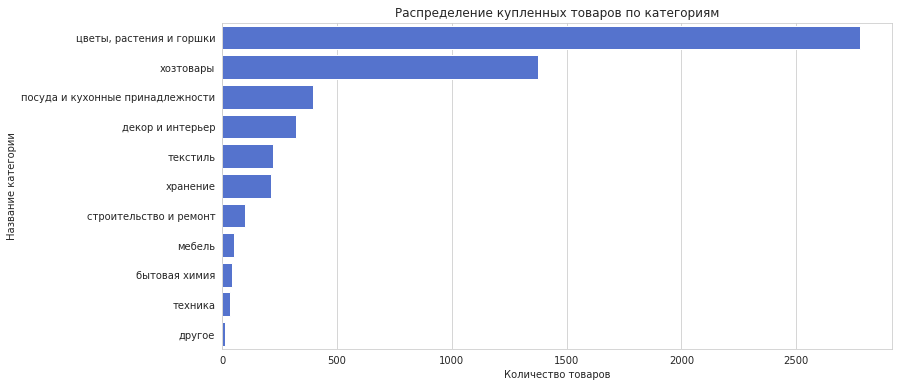

In [25]:
#подсчет количества товарных позиций по категориям
product_cat = (
    data.groupby('product_category', as_index=False)['product'].count()
    .sort_values(by='product', ascending=False)
)
#график распределения товарных позиций по категориям
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='product', y='product_category', data=product_cat, color='#4169E1') 
plt.title('Распределение купленных товаров по категориям')
plt.xlabel('Количество товаров')
plt.ylabel('Название категории')
plt.show()

Чаще всего покупают товары из категорий: цветы, растения и горшки, хозтовары, посуда и кухонные принадлежности. Реже всего в заказах появляются товары из категорий: другое, техника, бытовая химия, мебель.

Также узнаем, товары каких категорий лидируют по количеству купленных единиц товаров.

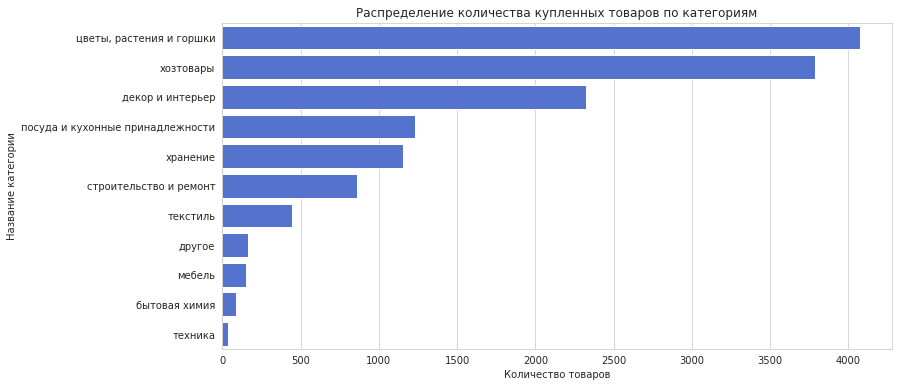

In [26]:
#подсчет количества товаров по категориям
most_purch_cat = (
    data.groupby('product_category', as_index=False)['quantity'].sum()
    .sort_values(by='quantity', ascending=False)
)
#график распределения товаров по категориям
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='quantity', y='product_category', data=most_purch_cat, color='#4169E1') 
plt.title('Распределение количества купленных товаров по категориям')
plt.xlabel('Количество товаров')
plt.ylabel('Название категории')
plt.show()

Топ-3 категории товаров по количеству проданных единиц товаров: цветы, растения и горшки, хозтовары, декор и интерьер. При чем заметим, что по количеству проданных единиц товаров цветы опережают хозтовары не так сильно.

### Распределение количества товаров в заказе

Построим график распределения количества товаров (единиц товара) в заказе.

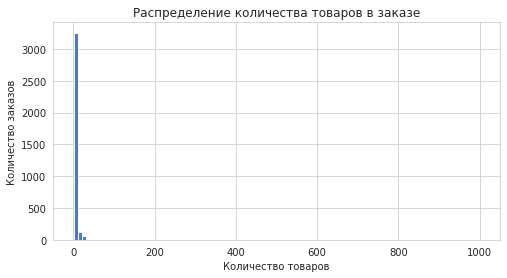

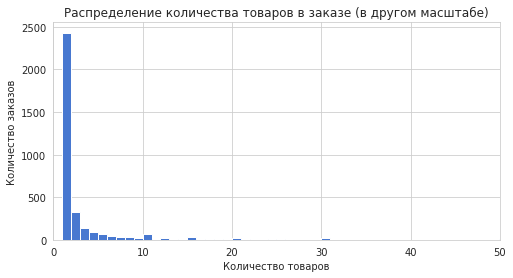

In [27]:
#гистограмма распределения количества товаров в заказе
plt.figure(figsize=(8, 4))
ax = data.groupby('order_id')['quantity'].sum().hist(bins=100)
ax.set_title('Распределение количества товаров в заказе')
ax.set_xlabel('Количество товаров')
ax.set_ylabel('Количество заказов')
plt.show()
#гистограмма распределения количества товаров в заказе в другом масштабе
plt.figure(figsize=(8, 4))
ax = data.groupby('order_id')['quantity'].sum().hist(bins=1000)
ax.set_title('Распределение количества товаров в заказе (в другом масштабе)')
ax.set_xlabel('Количество товаров')
ax.set_ylabel('Количество заказов')
ax.set_xlim(0, 50)
plt.show()

Судя по гистограммам, чаще всего встречаются заказы, где единиц товара не более двух. Рассмотрим значения подробнее с помощью диаграммы размаха.

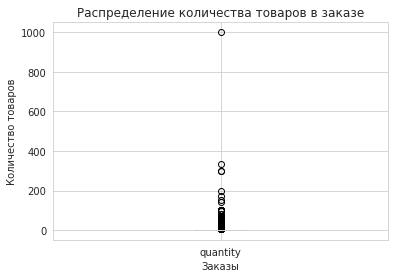

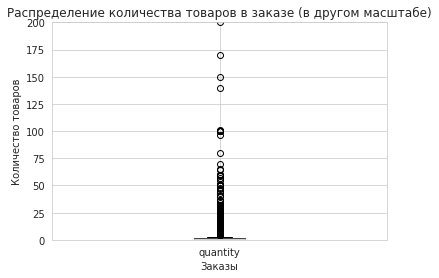

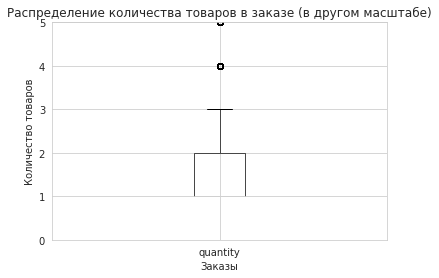

In [28]:
#диаграмма размаха количества товаров в заказе
data.groupby('order_id', as_index=False)['quantity'].sum().boxplot('quantity')
plt.title("Распределение количества товаров в заказе")
plt.ylabel("Количество товаров")
plt.xlabel("Заказы")
plt.show()
#диаграмма размаха количества товаров в заказе в другом масштабе
data.groupby('order_id', as_index=False)['quantity'].sum().boxplot('quantity')
plt.title("Распределение количества товаров в заказе (в другом масштабе)")
plt.ylabel("Количество товаров")
plt.xlabel("Заказы")
plt.ylim(0, 200)
plt.show()
#диаграмма размаха количества товаров в заказе в другом масштабе
data.groupby('order_id', as_index=False)['quantity'].sum().boxplot('quantity')
plt.title("Распределение количества товаров в заказе (в другом масштабе)")
plt.ylabel("Количество товаров")
plt.xlabel("Заказы")
plt.ylim(0, 5)
plt.show()

Количество товаров в заказе, превышающее 3 единицы, можно считать выбросами. Заказы, с более, чем 50 товарами, встречаются очень редко. Сильно выделяется один заказ с 1000 единиц товара. Изучим большие заказы более подробно. 

In [29]:
#подсчет количества товаров в заказах
prod_by_order = (
    data.groupby('order_id', as_index=False)['quantity'].sum()
    .sort_values(by='quantity', ascending=False)
)

Определим границу количества товаров в заказе, отделяющую аномалии. Для этого выведем значения 95 и 99 персентилей.  

In [30]:
print(np.percentile(prod_by_order['quantity'], [95, 99]))
np.percentile(prod_by_order['quantity'], [99])[0]

[15.   48.18]


48.18000000000029

Делаем вывод, что не более 5% заказов содержат более 15 единиц товара, а более 48.18 единиц товара содержит не более 1% заказов. Для определения аномально больших заказов выберем границу 48.18.

In [31]:
#сохранение значения 99 персентиля в переменную
perc_99_quantity = np.percentile(prod_by_order['quantity'], [99])[0]
#сохранение списка с номерами заказов с аномально большим количеством товаров
big_orders = prod_by_order.query('quantity > @perc_99_quantity')['order_id']
#вывод данных по заказам с наибольшим количеством товаров
with pd.option_context("display.max_rows", None):
    display(data.query('order_id in @big_orders'))

,date,customer_id,order_id,product,quantity,price,revenue,month,product_category
13,2018-10-01,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,крючок одежный 2-х рожковый серый металлик с п...,96,38.0,3648.0,2018-10-01,другое
152,2018-10-09,c971fb21-d54c-4134-938f-16b62ee86d3b,68580,"стяжка оконная с болтом ст-55 цинк, 1108354",64,19.0,1216.0,2018-10-01,мебель
165,2018-10-10,3e2c8193-3fc0-4607-a59f-bcdf169ce351,68599,муляж апельсин 8 см полиуретан,25,51.0,1275.0,2018-10-01,декор и интерьер
166,2018-10-10,3e2c8193-3fc0-4607-a59f-bcdf169ce351,68599,муляж яблоко зеленый 9 см полиуретан,25,51.0,1275.0,2018-10-01,декор и интерьер
225,2018-10-12,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68623,"петля приварная гаражная d 14х90 мм с шаром, 1...",50,38.0,1900.0,2018-10-01,строительство и ремонт
258,2018-10-16,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,2850.0,2018-10-01,строительство и ремонт
259,2018-10-16,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,5700.0,2018-10-01,хозтовары
270,2018-10-17,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,щетка для посуды *мила* sv3182 1807009,50,27.0,1350.0,2018-10-01,хозтовары
271,2018-10-17,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,"щетка-утюжок с ручкой миди, standart, york, g1126",50,44.0,2200.0,2018-10-01,хозтовары
539,2018-11-01,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0,8670.0,2018-11-01,декор и интерьер


Самый большой заказ — большая закупка вантузов. Вполне реалистичная покупка, например, для гостиничной сети. Этот же заказ вантузов имеет наибольшее значение в столбце `revenue`, что вполне логично.

Выясним, какие категории товаров закупают оптом. Количество единиц товара, чтобы заказ считался оптовым, в разных магазинах может сильно отличаться, но предположим, что заказы с аномально большим количеством товаров — оптовые. 

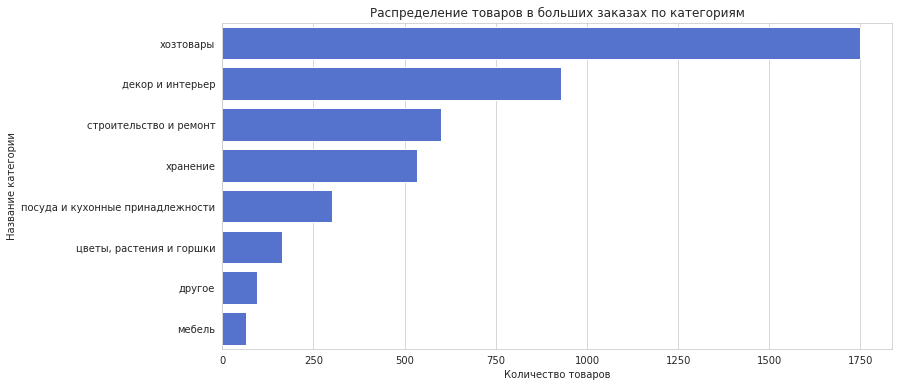

In [32]:
#подсчет количества товаров в больших заказах по категориям
big_order_cat = data.query('order_id in @big_orders').groupby('product_category', 
                                        as_index=False)['quantity'].sum().sort_values(by='quantity', ascending=False)
#график распределения товаров в больших заказах по категориям
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='quantity', y='product_category', data=big_order_cat, color='#4169E1') 
plt.title('Распределение товаров в больших заказах по категориям')
plt.xlabel('Количество товаров')
plt.ylabel('Название категории')
plt.show()

Среди заказов, содержащих наибольшее количество единиц товара, лидируют категории: хозтовары, декор и интерьер, строительство и ремонт. Для этих категорий товаров большое количество выглядит нормально, т.к. даже не оптовому покупателю могут понадобиться шпингалеты, или плечики для одежды в большом количестве. 

Но так же есть и заказы, действительно похожие на оптовые. Например, заказ на 1000 вантузов, или 80 кухонных ножей. Покупателями могут быть, например, гостиничные сети, строительные компании, любые заведения общепита/бизнес-центры/офисы и т.д.

### Распределение цен на товары

Проверим распределение цен на товары с помощью диаграммы размаха.

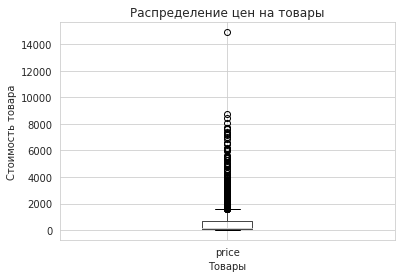

In [33]:
#диаграмма размаха цен на товары
data.groupby('product', as_index=False)['price'].mean().boxplot('price')
plt.title("Распределение цен на товары")
plt.ylabel("Стоимость товара")
plt.xlabel("Товары")
plt.show()

Судя по диаграмме, выбросов достаточно много. Сильно выделяется один товар с ценой выше 14000. Выведем список товаров с ценой выше 7000 и убедимся в том, что цены реалистичны. 

In [34]:
data.groupby('product', as_index=False)['price'].mean().query('price > 7000')\
.sort_values(by='price', ascending=False)

,product,price
1805,сушилка уличная leifheit 85210 linomatic v 400...,14917.0
1634,сумка-тележка хозяйственная andersen royal sho...,8737.0
1633,сумка-тележка хозяйственная andersen alu star ...,8437.0
1681,сумка-тележка хозяйственная rolser mnb019 rojo...,8077.0
1580,стремянка 7 ступенчатая hailo 8040-707 xxl 13 ...,7724.0
1665,сумка-тележка хозяйственная rolser imx006 bass...,7679.0
1680,сумка-тележка хозяйственная rolser mnb017 fucs...,7679.0
1682,сумка-тележка хозяйственная rolser mou041 malv...,7597.0
253,гладильная доска leifheit airboard compact m p...,7424.0
2014,урна уличная стальная сальвадор 02.021.0 46х11...,7349.0


Оказалось, что самые высокие цены приходятся не на технику, а на хозтовары либо для улицы, либо премиального (или около того) сегмента. Цены соответствуют реальности.

### Распределение стоимости заказов

Узнаем, как распределяется стоимость заказов. Для этого построим гистограмму.

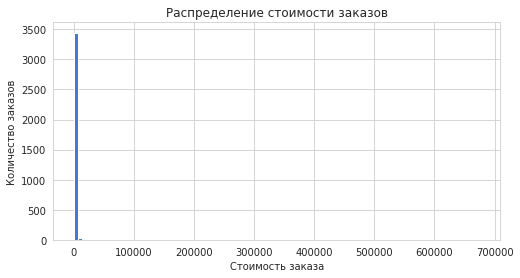

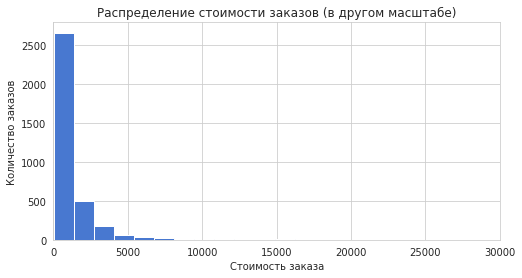

In [35]:
#гистограмма распределения стоимости заказов
plt.figure(figsize=(8, 4))
ax = data.groupby('order_id')['revenue'].sum().hist(bins=100)
ax.set_title('Распределение стоимости заказов')
ax.set_xlabel('Стоимость заказа')
ax.set_ylabel('Количество заказов')
plt.show()
#гистограмма распределения стоимости заказов в другом масштабе
plt.figure(figsize=(8, 4))
ax = data.groupby('order_id')['revenue'].sum().hist(bins=500)
ax.set_title('Распределение стоимости заказов (в другом масштабе)')
ax.set_xlabel('Стоимость заказа')
ax.set_ylabel('Количество заказов')
ax.set_xlim(0, 30000)
plt.show()

Видим, что стоимость большинства заказов не превышает 5000. Изучим значения подробнее с помощью диаграмм размаха.

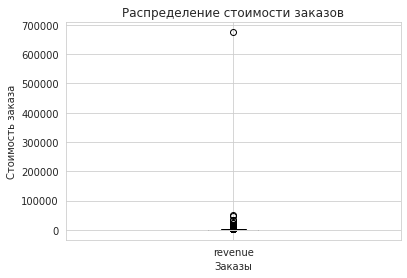

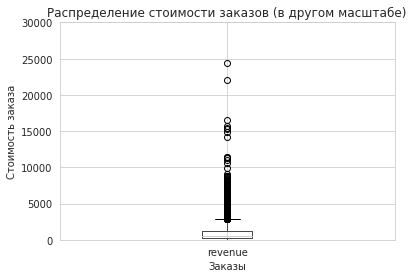

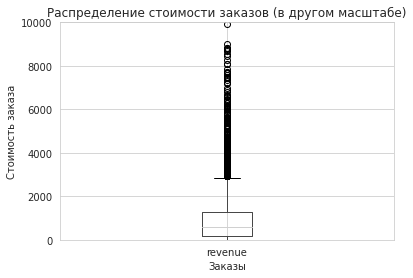

In [36]:
#диаграмма размаха стоимости заказов
data.groupby('order_id', as_index=False)['revenue'].sum().boxplot('revenue')
plt.title("Распределение стоимости заказов")
plt.ylabel("Стоимость заказа")
plt.xlabel("Заказы")
plt.show()
#диаграмма размаха стоимости заказов в другом масштабе
data.groupby('order_id', as_index=False)['revenue'].sum().boxplot('revenue')
plt.title("Распределение стоимости заказов (в другом масштабе)")
plt.ylabel("Стоимость заказа")
plt.xlabel("Заказы")
plt.ylim(0, 30000)
plt.show()
#диаграмма размаха стоимости заказов в другом масштабе
data.groupby('order_id', as_index=False)['revenue'].sum().boxplot('revenue')
plt.title("Распределение стоимости заказов (в другом масштабе)")
plt.ylabel("Стоимость заказа")
plt.xlabel("Заказы")
plt.ylim(0, 10000)
plt.show()

Сильно выделяется заказ со стоимостью более 600000, это тот самый большой заказ вантузов, как мы выяснили в пункте 3.1. Судя по диаграммам, заказы со стоимостью более 3000 можно считать выбросами. Заказы со стоимостью более 10000 встречаются очень редко. 


In [37]:
#подсчет стоимости заказов с сортировкой по убыванию стоимости
revenue_by_order = (
    data.groupby('order_id', as_index=False)['revenue'].sum()
    .sort_values(by='revenue', ascending=False)
)

Определим более точную границу стоимости, отделяющую аномалии. Для этого выведем значения 95 и 99 персентилей.  

In [38]:
print(np.percentile(revenue_by_order['revenue'], [95, 99]))

[3782.6  7604.38]


Делаем вывод, что не более 5% заказов имеют стоимость более 3782.6, а стоимость более 7604.38 имеет не более 1% заказов. Для определения аномально больших заказов выберем границу 7604.38.

Изучим состав заказов с аномально большой стоимостью.

In [39]:
#сохранение значения 99 персентиля в переменную
perc_99_revenue = np.percentile(revenue_by_order['revenue'], [99])[0]
#сохранение списка с номерами заказов с наибольшей стоимостью
big_orders_revenue = revenue_by_order.query('revenue > @perc_99_revenue')['order_id']
#вывод данных по заказам с наибольшим количеством уникальных товаров (товарных позиций)
with pd.option_context("display.max_rows", None):
    display(data.query('order_id in @big_orders_revenue'))

,date,customer_id,order_id,product,quantity,price,revenue,month,product_category
95,2018-10-04,d1a13243-9111-454f-848c-dcce0958528c,68529,сумка-тележка хозяйственная andersen scala sho...,1,5024.0,5024.0,2018-10-01,хозтовары
96,2018-10-04,d1a13243-9111-454f-848c-dcce0958528c,68529,сумка-тележка хозяйственная rolser jet cuadro ...,1,3734.0,3734.0,2018-10-01,хозтовары
258,2018-10-16,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,2850.0,2018-10-01,строительство и ремонт
259,2018-10-16,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,5700.0,2018-10-01,хозтовары
365,2018-10-23,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68727,"веник сорго с деревянной ручкой с 4-мя швами, ...",17,530.0,9010.0,2018-10-01,хозтовары
406,2018-10-26,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,вешалка деревянная с расширенными плечиками и ...,8,262.0,2096.0,2018-10-01,хранение
408,2018-10-26,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,вешалка с закругленными плечиками без переклад...,7,106.0,742.0,2018-10-01,хранение
413,2018-10-26,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,"короб стеллажный с крышкой большой, 30*40*25 с...",1,674.0,674.0,2018-10-01,хранение
414,2018-10-26,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,"короб стеллажный с крышкой малый, 28*30*16 см,...",3,524.0,1572.0,2018-10-01,хранение
417,2018-10-26,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,набор вешалок мягких тканевых с перекладиной 3...,2,277.0,554.0,2018-10-01,хранение


Судя по составу заказов со стоимостью от 10000, среди них встречаются как похожие на оптовые, так и просто объемные заказы либо за счет количества позиций (например, покупатель-новосел), либо за счет высокой стоимости товара (например, заказ с уличной сушилкой, самым дорогим товаром в датасете).

Определим, товары каких категорий встречаются в заказах с наибольшей стоимостью чаще всего.

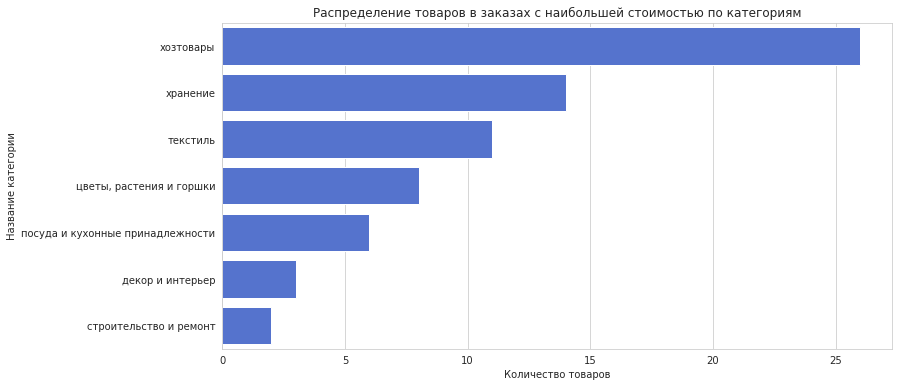

In [40]:
#определение категорий товаров в "дорогих" заказах
big_order_rev_cat = (
    data.query('order_id in @big_orders_revenue')
    .groupby('product_category', as_index=False)['product'].count()
    .sort_values(by='product', ascending=False)
)
#график распределения товаров в "дорогих" заказах по категориям
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='product', y='product_category', data=big_order_rev_cat, color='#4169E1') 
plt.title('Распределение товаров в заказах с наибольшей стоимостью по категориям')
plt.xlabel('Количество товаров')
plt.ylabel('Название категории')
plt.show()

Как и в случае с заказами с наибольшим количеством товаров, лидирует категория хозтоваров. После идут категории хранение и текстиль.

### Распределение количества заказов на пользователя

Рассмотрим значения количества заказов на пользователя. 

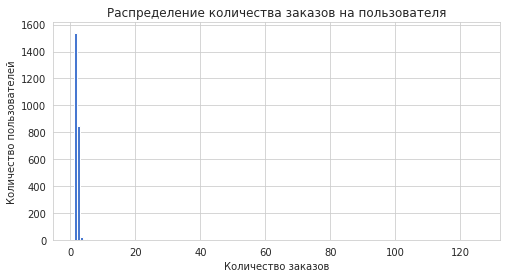

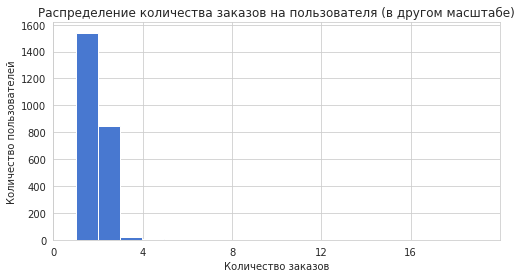

In [41]:
#гистограмма распределения количества заказов на пользователя
plt.figure(figsize=(8, 4))
ax = data.groupby('customer_id')['order_id'].nunique().hist(bins=126)
ax.set_title('Распределение количества заказов на пользователя')
ax.set_xlabel('Количество заказов')
ax.set_ylabel('Количество пользователей')
plt.show()
#гистограмма распределения количества заказов на пользователя в другом масштабе
plt.figure(figsize=(8, 4))
ax = data.groupby('customer_id')['order_id'].nunique().hist(bins=126)
ax.set_title('Распределение количества заказов на пользователя (в другом масштабе)')
ax.set_xlabel('Количество заказов')
ax.set_ylabel('Количество пользователей')
ax.set_xlim(0, 20)
plt.xticks(np.arange(0, 20, 4))
plt.show()

По гистограммам видим, что подавляющее большинство пользователей делает не более двух заказов.

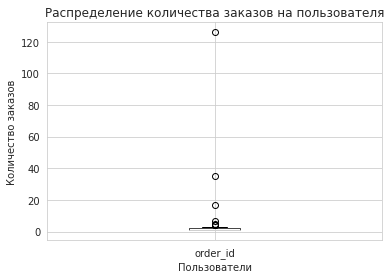

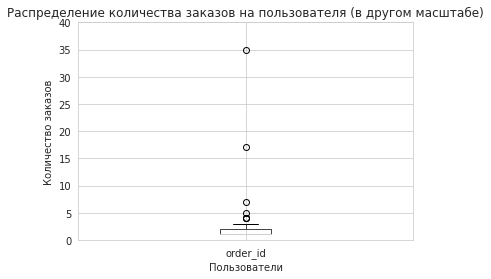

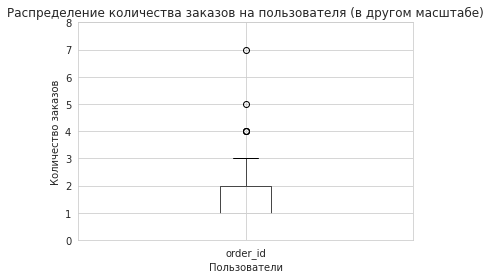

In [42]:
#диаграмма размаха количества заказов на пользователя
data.groupby('customer_id', as_index=False)['order_id'].nunique().boxplot('order_id')
plt.title("Распределение количества заказов на пользователя")
plt.ylabel("Количество заказов")
plt.xlabel("Пользователи")
plt.show()
#диаграмма размаха количества заказов на пользователя в другом масштабе
data.groupby('customer_id', as_index=False)['order_id'].nunique().boxplot('order_id')
plt.title("Распределение количества заказов на пользователя (в другом масштабе)")
plt.ylabel("Количество заказов")
plt.xlabel("Пользователи")
plt.ylim(0, 40)
plt.show()
#диаграмма размаха количества заказов на пользователя в другом масштабе
data.groupby('customer_id', as_index=False)['order_id'].nunique().boxplot('order_id')
plt.title("Распределение количества заказов на пользователя (в другом масштабе)")
plt.ylabel("Количество заказов")
plt.xlabel("Пользователи")
plt.ylim(0, 8)
plt.show()

Судя по диаграммам, количество заказов на пользователя, превышающее 3, можно считать выбросами и такое количество заказов встречается очень редко. 

In [43]:
#подсчет заказов на пользователя с сортировкой по убыванию
orders_by_customer = (
    data.groupby('customer_id', as_index=False)['order_id'].nunique()
    .sort_values(by='order_id', ascending=False)
)

Определим более точную границу количества заказов на пользователя, отделяющую аномалии. Для этого выведем значения 95 и 99 персентилей.  

In [44]:
print(np.percentile(orders_by_customer['order_id'], [95, 99]))

[2. 3.]


Делаем вывод, что не более 5% пользователей сделали более 2 заказов и не более 1% пользователей сделали более 3 заказов. Для определения аномалий выберем границу в 3 заказа.

Узнаем, что покупают пользователи с большим количеством заказов.

In [45]:
#сохранение значения 99 персентиля в переменную
perc_99_orders = np.percentile(orders_by_customer['order_id'], [99])[0]
#сохранение списка пользователей с большим количеством заказов
max_customer = orders_by_customer.query('order_id > @perc_99_orders')['customer_id']
#вывод данных по заказам пользователей с большим количеством заказов
data.query('customer_id in @max_customer')

,date,customer_id,order_id,product,quantity,price,revenue,month,product_category
9,2018-10-01,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beig...,1,674.0,674.0,2018-10-01,хозтовары
12,2018-10-01,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68485,чехол eurogold clean basic хлопок для досок 12...,1,187.0,187.0,2018-10-01,хозтовары
20,2018-10-02,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,чехол для гладильной доски festival 137x60 см ...,1,1162.0,1162.0,2018-10-01,хозтовары
21,2018-10-02,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68491,сумка-тележка 2-х колесная gimi argo синяя,1,1049.0,1049.0,2018-10-01,хозтовары
42,2018-10-02,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,щетка-сметка 3-х рядная деревянная 450 мм (пло...,15,49.0,735.0,2018-10-01,хозтовары
...,...,...,...,...,...,...,...,...,...
5627,2019-10-22,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73055,"сушилка для белья потолочная лиана 1,5 м 1703004",1,524.0,524.0,2019-10-01,хозтовары
5635,2019-10-23,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73071,"сушилка для белья потолочная лиана 2,2 м 1703010",1,697.0,697.0,2019-10-01,хозтовары
5644,2019-10-25,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73086,сумка-тележка 2-х колесная складная gimi flexi...,1,1649.0,1649.0,2019-10-01,хозтовары
5679,2019-10-31,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"таз пластмассовый 40,0 л пищевой овальный (иж)...",1,404.0,404.0,2019-10-01,хозтовары


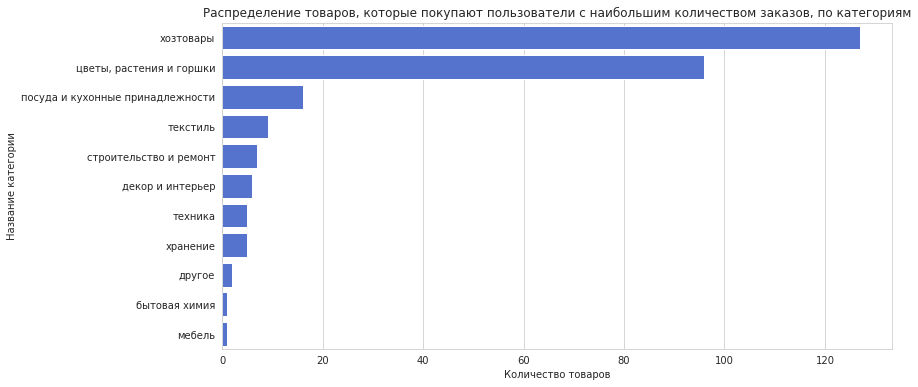

In [46]:
#определение категорий товаров, которые покупают пользователи с наибольшим количеством заказов
max_customer_cat = (
    data.query('customer_id in @max_customer')
    .groupby('product_category', as_index=False)['product'].count()
    .sort_values(by='product', ascending=False)
)
#график распределения товаров, которые покупают пользователи с наибольшим количеством заказов, по категориям
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='product', y='product_category', data=max_customer_cat, color='#4169E1') 
plt.title('Распределение товаров, которые покупают пользователи с наибольшим количеством заказов, по категориям')
plt.xlabel('Количество товаров')
plt.ylabel('Название категории')
plt.show()

Покупатели с наибольшим количеством заказов предпочитают товары из категорий: хозтовары и цветы, растения и горшки.

### Выводы по исследовательскому анализу

1. Чаще всего покупают товары из категорий: 
- цветы, растения и горшки, 
- хозтовары, 
- посуда и кухонные принадлежности.

Реже всего в заказах появляются товары из категорий: 
- другое, 
- техника, 
- бытовая химия, 
- мебель.

2. Топ-3 категории товаров по количеству проданных единиц товаров: 
- цветы, растения и горшки, 
- хозтовары, 
- посуда и кухонные принадлежности.

3. Чаще всего встречаются заказы с 1-3 единицами товаров. Заказы с более, чем 50 товарами, встречаются очень редко.

4. Среди заказов, содержащих наибольшее количество единиц товара, лидируют категории: 
- хозтовары, 
- декор и интерьер, 
- строительство и ремонт.

5. Самые высокие цены товаров приходятся на хозтовары либо для улицы, либо премиального (или около того) сегмента.

6. Стоимость большинства заказов не превышает 3000. Заказы со стоимостью более 8000 встречаются очень редко.

7. В заказах с наибольшей стоимостью чаще всего встречаются товары из категорий:
- хозтовары,
- хранение, 
- текстиль.

8. Количество заказов на пользователя, превышающее 3, встречается очень редко.

9. Покупатели с наибольшим количеством заказов предпочитают товары из категорий: 
- хозтовары, 
- цветы, растения и горшки.

### Фильтрация аномалий

Заказы с аномально большой стоимостью могут внести искажения в исследование показателей. Создадим таблицу, в которой отфильтруем такие заказы.

In [47]:
#фильтрация заказов с аномально большой стоимостью
data_filtered = data.query('order_id not in @big_orders_revenue')

In [48]:
print('До фильтрации:', len(data))
print('После фильтрации:', len(data_filtered))
print('Отфильтровано', round((1 - len(data_filtered)/len(data)) * 100, 2), '% данных')

До фильтрации: 5544
После фильтрации: 5474
Отфильтровано 1.26 % данных


## Основные вопросы исследования

### Основные показатели интернет-магазина

#### Анализ динамики выручки

Изучим динамику выручки по полным данным и по отфильтрованным и сравним их.

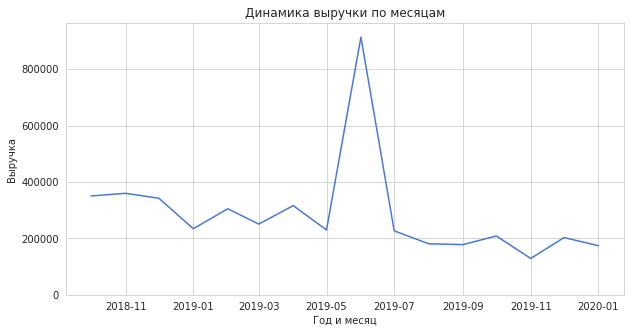

In [49]:
#подсчет выручки по месяцам
revenue_by_month = data.groupby('month', as_index=False)['revenue'].sum().sort_values(by='month')

#график динамики выручки по месяцам
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x='month', y='revenue', data=revenue_by_month)
ax.set_title('Динамика выручки по месяцам')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Выручка')
ax.set_ylim(0, revenue_by_month['revenue'].max() + 50000)
plt.show()

В июне 2019 года был пик выручки. В июне был сделан заказ на 1000 вантузов, чем и объяснятся наличие пика.

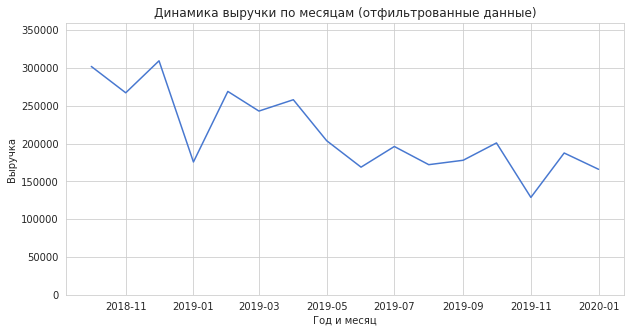

In [50]:
#подсчет выручки по месяцам на отфильтрованных данных
revenue_by_month_fil = data_filtered.groupby('month', as_index=False)['revenue'].sum()
#график динамики выручки по месяцам
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x='month', y='revenue', data=revenue_by_month_fil)
ax.set_title('Динамика выручки по месяцам (отфильтрованные данные)')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Выручка')
ax.set_ylim(0, revenue_by_month_fil['revenue'].max() + 50000)
plt.show()

По отфильтрованным данным можно отследить постепенное снижение выручки. Ноябрь 2019 прошел наиболее неудачно, здесь наблюдаем минимум за весь рассматриваемый период. При этом в ноябре 2018 резкого снижения не было. 

Снижение выручки в январе похоже на сезонное явление — снижения есть и в 2019 и в 2020. С точки зрения логики это тоже объяснимо, т.к. рассада в январе — не самая актуальная покупка, а спрос на хозтовары и прочие бытовые товары может упасть из-за длинных праздников, когда у людей совсем другие заботы.

#### Средний чек и динамика его изменения

Динамику среднего чека изучим только по отфильтрованным данным, т.к. аномально дорогие заказы (особенно июньские вантузы) сильно исказят значение среднего чека.

In [51]:
#подсчет стоимости заказов по отфильтрованным данным
orders_revenue_fil = data_filtered.groupby(['month', 'order_id'], as_index=False)['revenue'].sum()
#подсчет среднего чека по месяцам
average_bill_month_fil = orders_revenue_fil.groupby('month', as_index=False)['revenue'].mean()

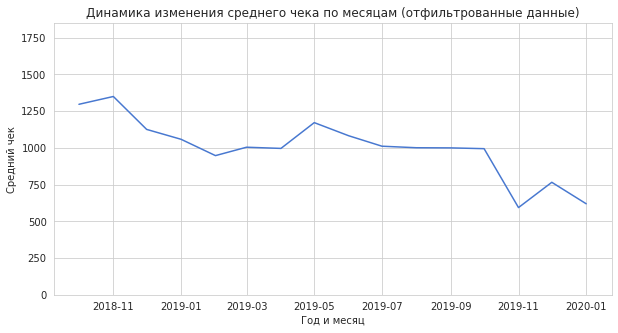

In [52]:
#график динамики среднего чека
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x='month', y='revenue', data=average_bill_month_fil)
ax.set_title('Динамика изменения среднего чека по месяцам (отфильтрованные данные)')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Средний чек')
ax.set_ylim(0, average_bill_month_fil['revenue'].max() + 500)
plt.show()

Средний чек также, как и выручка постепенно снижается. При этом с ноября 2019 наблюдаются минимальные значения за весь период. Можно предположить, что снижение выручки в ноябре 2019 может быть обусловлено снижением среднего чека.

#### Динамика средней выручки с покупателя

Поскольку будем рассматривать среднее значение, возьмем сразу отфильтрованные данные, т.к. выбросы сильно смещают средние значения.

In [53]:
#подсчет стоимости заказов по отфильтрованным данным
customers_revenue_fil = data_filtered.groupby(['month', 'customer_id'], as_index=False)['revenue'].sum()
#подсчет средней выручки по месяцам
arpu_month_fil = customers_revenue_fil.groupby('month', as_index=False)['revenue'].mean()

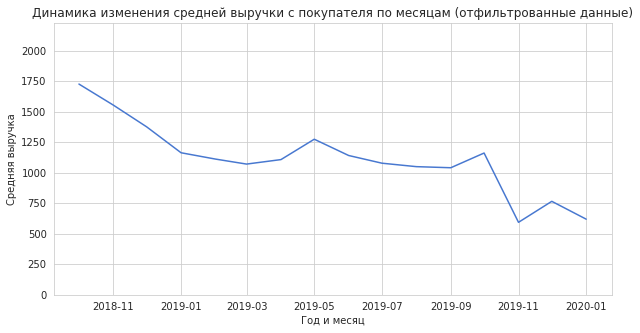

In [54]:
#график динамики средней выручки по месяцам
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x='month', y='revenue', data=arpu_month_fil)
ax.set_title('Динамика изменения средней выручки с покупателя по месяцам (отфильтрованные данные)')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Средняя выручка')
ax.set_ylim(0, arpu_month_fil['revenue'].max() + 500)
plt.show()

Видим, что и средняя выручка с покупателя просела с ноября 2019. С учетом снижения среднего чека можно сказать, что покупатели стали тратить меньшие суммы, вследствие чего снизилась выручка.

#### Выводы по основным показателям

1. Имеет место постепенное снижение выручки. Ноябрь 2019 прошел наиболее неудачно, здесь наблюдаем минимум за весь рассматриваемый период. При этом в ноябре 2018 резкого снижения не было. Снижение выручки в январе похоже на сезонное явление — снижения есть и в 2019 и в 2020.
2. Средний чек также, как и выручка постепенно снижается. При этом с ноября 2019 наблюдаются минимальные значения за весь период. Можно предположить, что снижение выручки в ноябре 2019 может быть обусловлено снижением среднего чека.
3. Средняя выручка с покупателя просела с ноября 2019. С учетом снижения среднего чека можно сказать, что покупатели стали тратить меньшие суммы, вследствие чего снизилась выручка.

### Сегментация покупателей на основе истории покупок

#### Определение сегментов покупателей

Для сегментации клиентов будем опираться на теорию <b>RFM-анализа</b>. Это один из методов анализа, с помощью которого можно делить клиентов на группы в зависимости от времени последнего визита, частоты и суммы покупок. Такие данные помогают выявить наиболее значимых клиентов и выстроить процесс работы с каждой группой. 

RFM расшифровывается как:
- <b>R</b> (от англ. recency – давность) – определяет, как давно была совершена сделка. Показывает, сколько прошло времени с последней покупки. 

- <b>F</b> (от англ. frequency – частота) – показывает, насколько часто клиент покупает товар или пользуется определенной услугой. 

- <b>M</b> (от англ. monetary – деньги) – общая вложенность средств в продукт или услугу. Также это можно понимать как общую активность на сайте либо длительность посещения. 

В нашем случае будем использовать не все признаки, т.к. данных не так много и при делении по всем признакам и подгруппам получим слишком мелкие сегменты. Разделять клиентов будем по признаку `recency`. Признак общей вложенности средств учтем с помощью отдельного изучения данных по клиентам с аномально дорогими заказами. 

Признак давности разделим на три подгруппы. Описание каждого сегмента приведем ниже.

| Сегмент | Описание | Рекомендация | 
| :---------------------- | :---------------------- | :---------------------- |
| Ушедшие клиенты | Клиенты, которые совершали покупки очень давно.| В данном случае можно постараться вернуть клиентов с помощью рассылки. Например, можно отправить опрос и узнать, почему клиенты больше не возвращаются. |
| Неактивные клиенты | Относительно недавние клиенты.| Такие клиенты были в магазине недавно, поэтому еще помнят нас и, возможно, еще будут совершать покупки. Поэтому следует напомнить о себе. Например, с помощью рассылки, где будет указана информация о специальных предложениях, акциях и так далее. |
| Постоянные клиенты | Только пришедшие клиенты, или совершившие последнюю покупку совсем недавно.| Из этого сегмента можно выделить потенциальных VIP-клиентов. Клиентам, совершившим лишь одну покупку, следует отправить приветственное письмо и привить интерес к продукту. Для клиентов с небольшим средним чеком можно попробовать увеличить сумму чека. Сделать это можно с помощью рассылки с сопутствующими товарами. Клиентам с большой стоимостью заказов следует отправлять особые предложения, например, это может быть программа лояльности либо приглашение в VIP-клуб. |

Для определения значения признака давности узнаем дату последней покупки для каждого покупателя и напишем функцию, которая определит значение признака. Для определения категориии давности используем значения персентилей количества месяцев после совершения последней покупки, которые поделят пользователей на три примерно равные части: 
- для ушедших 70 персентиль, с помощью которого отделим около 30% пользователей "сверху", т.е. сделавших последний заказ наиболее давно по сравнению с остальными
- для постоянных 30 персентиль, который отделит около 30% пользователей "снизу", т.е. сделавших последний заказ совсем недавно по сравнению с остальными
- всех остальных будем считать относительно недавними

In [55]:
#определение даты последней покупки
last_order_date = data.groupby('customer_id', as_index=False)['date'].max()
today = pd.to_datetime(data['date'].max())
last_order_date['last_order_month_ago'] = (today - pd.to_datetime(last_order_date['date'])) / np.timedelta64(1, 'M')

In [56]:
month_ago_1 = np.percentile(last_order_date['last_order_month_ago'], [70])[0]
month_ago_3 = np.percentile(last_order_date['last_order_month_ago'], [30])[0]
print('Граница количества месяцев для ушедших:', round(month_ago_1, 2))
print('Граница количества месяцев для постоянных:', round(month_ago_3, 2))

Граница количества месяцев для ушедших: 10.48
Граница количества месяцев для постоянных: 2.96


In [57]:
#функция для определения значения признака давности
def get_recency(order_date):
    if order_date >= month_ago_1:
        return '1'
    elif order_date <= month_ago_3:
        return '3'
    else: 
        return '2'

In [58]:
#применение функции
last_order_date['recency'] = last_order_date['last_order_month_ago'].apply(get_recency)
#вывод первых пяти строк для проверки
last_order_date.head()

,customer_id,date,last_order_month_ago,recency
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16,3.515473,2
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16,11.466355,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14,3.581182,2
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27,12.123452,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29,4.074006,2


Для определения частоты используем созданную ранее таблицу `orders_by_customer`, в которой уже подсчитано количество заказов на пользователя. Здесь делить будем всего на 2 группы: одна покупка и более одной покупки.

Далее добавим значения давности покупки в таблицы с данными о покупках. Предлагаю анализировать отфильтрованные и от аномалий данные, и данные по покупателям с аномально дорогими заказами, но по отдельности. Создадим для этого разные таблицы.

In [59]:
#выделяем значения давности и id покупателей
user_recency = last_order_date[['customer_id', 'recency']]

In [60]:
#добавление данных по сегментам в общую таблицу с отфильтрованными данными
data_filtered_rfm = data_filtered.merge(user_recency, on='customer_id')
#вывод первых пяти строк для проверки
data_filtered_rfm.head()

,date,customer_id,order_id,product,quantity,price,revenue,month,product_category,recency
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,2018-10-01,"цветы, растения и горшки",1
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,2018-10-01,"цветы, растения и горшки",1
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,2018-10-01,"цветы, растения и горшки",1
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,2018-10-01,"цветы, растения и горшки",1
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,2018-10-01,"цветы, растения и горшки",1


In [61]:
#создание списка id клиентов, не входящих в аномальные
normal_customers = data_filtered['customer_id'].unique()
#создание таблицы с данными по аномальным клиентам и добавление данных по сегментам
data_anom_rfm = data.query('customer_id not in @normal_customers').merge(user_recency, on='customer_id')
#вывод первых пяти строк для проверки
data_anom_rfm.head()

,date,customer_id,order_id,product,quantity,price,revenue,month,product_category,recency
0,2018-10-04,d1a13243-9111-454f-848c-dcce0958528c,68529,сумка-тележка хозяйственная andersen scala sho...,1,5024.0,5024.0,2018-10-01,хозтовары,1
1,2018-10-04,d1a13243-9111-454f-848c-dcce0958528c,68529,сумка-тележка хозяйственная rolser jet cuadro ...,1,3734.0,3734.0,2018-10-01,хозтовары,1
2,2018-10-16,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,2850.0,2018-10-01,строительство и ремонт,1
3,2018-10-16,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,5700.0,2018-10-01,хозтовары,1
4,2018-10-26,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,вешалка деревянная с расширенными плечиками и ...,8,262.0,2096.0,2018-10-01,хранение,1


#### Анализ сегментов покупателей

Узнаем, как распределяются по сегментам все покупатели магазина.

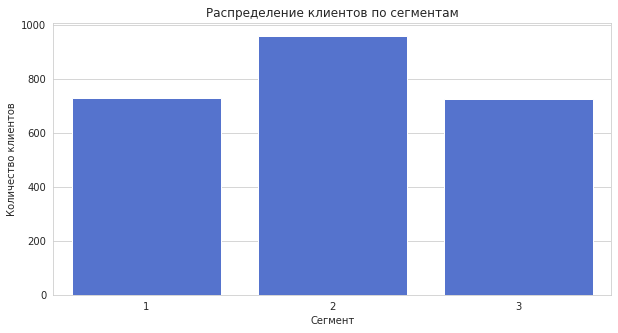

In [62]:
#график распределения клиентов по сегментам
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='recency', data=user_recency, color='#4169E1', 
                   order=user_recency['recency'].sort_values().unique()) 
plt.title('Распределение клиентов по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Количество клиентов')
plt.show()

Преобладает сегмент относительно недавних клиентов, но, в целом, размеры кластеров сопоставимы. Данных в каждом кластере должно быть достаточно для более детального анализа, в частности, анализа категорий товаров по сегментам

##### Средний чек по сегментам

Напишем функцию для подсчета среднего чека по месяцам и применим к отфильтрованным данным с сегментацией клиентов.

In [63]:
#функция для подсчета среднего чека для разных сегментов клиентов
def get_avg_bill(df, parameter_type=[], parameter=None):
    try:
        if parameter == None:
            parameter_type.append('order_id')
            orders_revenue = df.groupby(parameter_type, as_index=False)['revenue'].sum()
            parameter_type.remove('order_id')
            #подсчет среднего чека
            average_bill = orders_revenue.groupby(parameter_type, as_index=False)['revenue'].mean()
        else:
            data_by_parameter = df[df[parameter_type[0]] == parameter]
            parameter_type.append('order_id')
            #подсчет среднего чека
            average_bill = data_by_parameter.groupby(parameter_type, as_index=False)['revenue'].sum()
            if 'month' in parameter_type:
                parameter_type.remove('order_id')
                #подсчет среднего чека по месяцам
                average_bill = orders_revenue.groupby(parameter_type, as_index=False)['revenue'].mean()
        return average_bill
    except:
        print('Проверь данные на входе, или код функции')

In [64]:
#подсчет среднего чека по сегментам по месяцам с помощью функции
avg_bill_month_rfm = get_avg_bill(data_filtered_rfm, parameter_type=['recency', 'month'])

Для анализа динамики построим линейный график динамики среднего чека по сегментам.

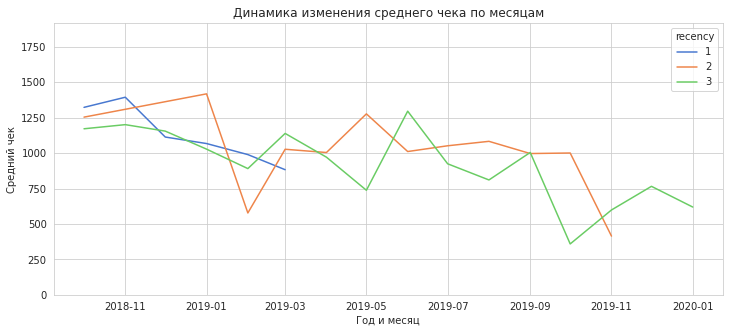

In [65]:
#график динамики среднего чека по сегментам
plt.figure(figsize=(12, 5))
ax = sns.lineplot(x='month', y='revenue', hue='recency', data=avg_bill_month_rfm)
ax.set_title('Динамика изменения среднего чека по месяцам')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Средний чек')
ax.set_ylim(0, avg_bill_month_rfm['revenue'].max() + 500)
plt.show()

По всем сегментам наблюдаем тенденцию к снижению среднего чека. Наиболее заметное снижение происходит с октября 2019. Это коррелирует с общей динамикой выручки и среднего чека.

У постоянных клиентов был пик среднего чека в июне 2019. Минимальный средний чек приходится на октябрь, ноябрь и январь 2019. При этом в октябре и ноябре 2018 значение было высоким.

Средний чек у неактивных клиентов показывает максимальные значения в январе 2019. Заметен небольшой пик в мае. Также можно заметить насколько сильно отличаются ноябрь 2018, который являлся продолжением восходящего тренда, и ноябрь 2019, где наблюдается резкое снижение.

Средний чек у ушедших клиентов после пикового ноября 2018 с декабря 2018 начал понемногу снижаться.

##### Средний чек по сегментам клиентов с аномально дорогими заказами

Отдельно рассмотрим аномальных клиентов.

In [66]:
#подсчет среднего чека по сегментам по месяцам с помощью функции
avg_bill_month_anom = get_avg_bill(data_anom_rfm, parameter_type=['recency', 'month'])

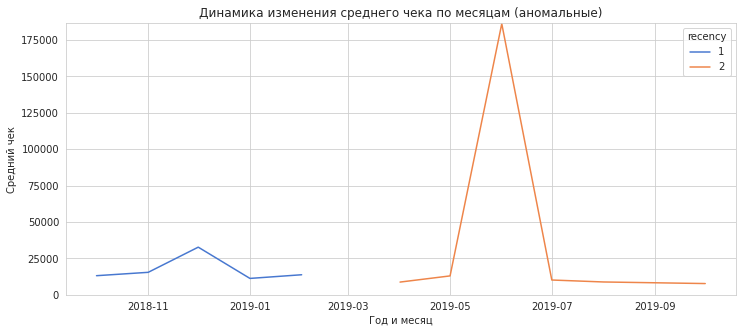

In [67]:
#график динамики среднего чека по сегментам
plt.figure(figsize=(12, 5))
ax = sns.lineplot(x='month', y='revenue', hue='recency', data=avg_bill_month_anom)
ax.set_title('Динамика изменения среднего чека по месяцам (аномальные)')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Средний чек')
ax.set_ylim(0, avg_bill_month_anom['revenue'].max() + 500)
plt.show()

Видим, что клиенты с аномально дорогими заказами относятся к двум сегментам из трех, т.е. среди них нет категории постоянных клиентов. Поскольку аномальных клиентов в целом мало, динамика показателей по их данным не сильно информативна. Июньский пик, как мы уже знаем, относится к большому заказу вантузов. 

##### Средняя выручка на пользователя по сегментам

Проделаем то же самое и для ARPU. Напишем функцию для подсчета ARPU по месяцам и применим к отфильтрованным данным с сегментацией клиентов.

In [68]:
#функцию для подсчета ARPU по месяцам по нужным параметрам
def get_arpu(df, parameter_type=[], parameter=None):
    try:
        if parameter == None:
            parameter_type.append('customer_id')
            customers_revenue = df.groupby(parameter_type, as_index=False)['revenue'].sum()
            parameter_type.remove('customer_id')
            #подсчет средней выручки с пользователя
            arpu = customers_revenue.groupby(parameter_type, as_index=False)['revenue'].mean()
        else:
            data_by_parameter = df[df[parameter_type[0]] == parameter]
            parameter_type.append('customer_id')
            #подсчет выручки с каждого клиента по месяцам
            arpu = data_by_parameter.groupby(parameter_type, as_index=False)['revenue'].sum()
            if 'month' in parameter_type:
                #подсчет средней выручки с пользователя по месяцам
                arpu = customers_revenue.groupby('month', as_index=False)['revenue'].mean()
        return arpu
    except:
        print('Проверь данные на входе, или код функции')

In [69]:
#подсчет средней выручки на пользователя по сегментам по месяцам с помощью функции
arpu_month_rfm = get_arpu(data_filtered_rfm, parameter_type=['month', 'recency'])

Для анализа динамики построим линейный график динамики ARPU по сегментам.

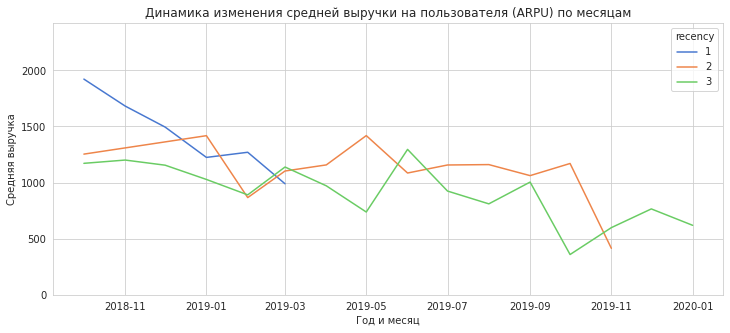

In [70]:
#график динамики ARPU по сегментам
plt.figure(figsize=(12, 5))
ax = sns.lineplot(x='month', y='revenue', hue='recency', data=arpu_month_rfm)
ax.set_title('Динамика изменения средней выручки на пользователя (ARPU) по месяцам')
ax.set_xlabel('Год и месяц')
ax.set_ylabel('Средняя выручка')
ax.set_ylim(0, arpu_month_rfm['revenue'].max() + 500)
plt.show()

По средней выручке на пользователя тоже прослеживается общий тренд на снижение, как и по общей динамике.

Несмотря на нисходящую динамику, у ушедших клиентов был достаточно высокий показатель ARPU. Это повод подумать о способах их возвращения. 

Также стоит подумать и о возвращении относительно недавних клиентов, т.к. ARPU большую часть времени держалась на более высоком уровне, чем у постоянных клиентов. Пиковые значения средней выручки на пользователя приходятся на январь 2019 и май 2019. Минимальное значение наблюдаем в ноябре 2019, при чем снижение произошло достаточно резко.

У постоянных клиентов ARPU была наиболее высокой в июне 2019. Минимальное значение наблюдаем в октябре 2019, после чего уровень хоть и повысился, но не восстановился до прежних значений.

Динамика ARPU для клиентов с аномально дорогими заказами будет практически идентична динамике среднего чека, т.к. большинство таких клиентов совершило по одному заказу.

##### Выводы по анализу сегментов

1. По всем сегментам наблюдаем тенденцию к <b>снижению среднего чека</b>. Наиболее заметное снижение происходит с октября 2019. Это коррелирует с общей динамикой выручки и среднего чека.

- <i>Постоянные клиенты</i>: максимум – в июне 2019, минимум – октябрь, ноябрь и январь 2019. При этом, если сравнивать с прошлым годом, в октябре и ноябре 2018 значение было высоким.

- <i>Неактивные клиенты</i>: максимум – в январе 2019 и заметен небольшой пик в мае, минимум – ноябрь 2019 и небольшая просадка в феврале 2019. Также можно заметить насколько сильно отличается ноябрь 2018, который являлся продолжением восходящего тренда, от ноября 2019, где наблюдается резкое снижение.

- <i>Ушедшие клиенты</i>: максимум – ноябрь 2018, минимум – март 2019. После пикового ноября 2018 с декабря 2018 начался тренд на снижение.


2. <b>Средняя выручка на пользователя</b> так же имеет тенденцию к снижению по каждому сегменту:

- <i>Ушедшие клиенты</i>: несмотря на нисходящую динамику, показатель ARPU был достаточно высоким. Это повод подумать о способах возвращения этого сегмента клиентов.

- <i>Неактивные клиенты</i>: ARPU большую часть времени держалась на более высоком уровне, чем у постоянных клиентов. Пиковые значения средней выручки на пользователя приходятся на январь 2019 и май 2019. Минимальное значение наблюдаем в ноябре 2019, при чем снижение произошло достаточно резко.

- <i>Постоянные клиенты</i>: ARPU была наиболее высокой в июне 2019. Минимальное значение наблюдаем в октябре 2019, после чего уровень хоть и повысился, но не восстановился до прежних значений.

#### Анализ категорий товаров и их сезонность по сегментам покупателей

##### Распределение товаров в заказах разных сегментов по товарным категориям 

Изучим, что чаще всего покупают клиенты в разных сегментах.

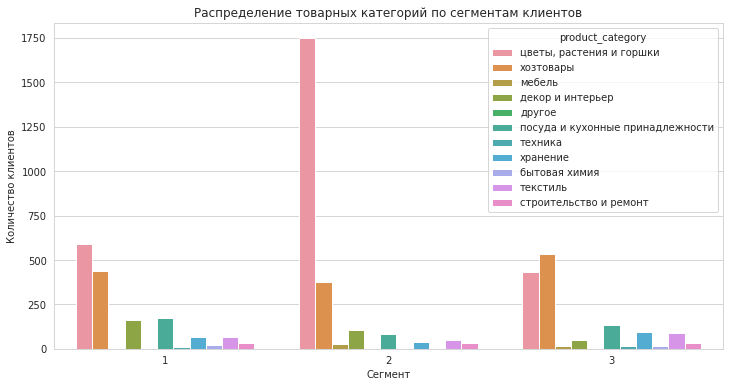

In [71]:
#графики распределения категорий товаров по сегментам клиентов
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='recency', data=data_filtered_rfm, hue='product_category') 
plt.title('Распределение товарных категорий по сегментам клиентов')
plt.xlabel('Сегмент')
plt.ylabel('Количество клиентов')
plt.show()

Во всех сегментах чаще всего встречаются товары из категории цветы, растения и горшки и хозтовары:
- в сегменте ушедших клиентов эти категории почти наравне, но лидируют цветы, растения и горшки
- в сегменте постоянных клиентов эти категории тоже почти наравне, но лидируют хозтовары
- в сегменте относительно недавних клиентов сильно чаще по сравнению с другими категориями покупают товары из категории цветы, растения и горшки

##### Распределение товаров в заказах разных сегментов по товарным категориям (клиенты с аномально дорогими заказами) 

Отдельно рассмотрим данные по клиентам с аномально дорогими заказами.

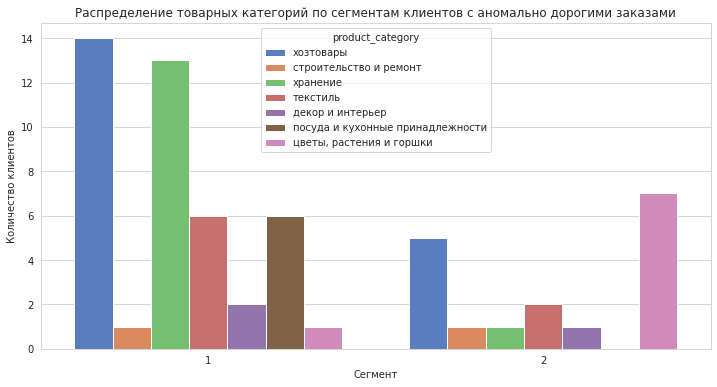

In [72]:
#графики распределения категорий товаров по сегментам клиентов
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='recency', data=data_anom_rfm, hue='product_category') 
plt.title('Распределение товарных категорий по сегментам клиентов c аномально дорогими заказами')
plt.xlabel('Сегмент')
plt.ylabel('Количество клиентов')
plt.show()

Среди ушедших клиентов c аномально дорогими заказами наиболее популярными категориями были хозтовары и хранение. Среди относительно недавних – хозтовары и цветы, растения и горшки. 

##### Динамика продаж категорий товаров по сегментам клиентов

Попробуем изучить динамику продаж категорий товаров и выявить влияние сезонности, если оно имеется. Не во всех категориях достаточно данных для анализа динамики. Как мы выяснили в пункте 3.1, категории другое, техника и бытовая химия редко встречаются в заказах, поэтому рассматривать динамику по ним не будем.

Для анализа построим линейные графики количества продаж категорий товаров.

In [73]:
#сохранение наиболее продаваемых категорий в переменную
top_cat = product_cat['product_category'].head(7)
#фильтрация данных по наиболее продаваемым категориям
data_filtered_top_cat = data_filtered_rfm.query('product_category in @top_cat')

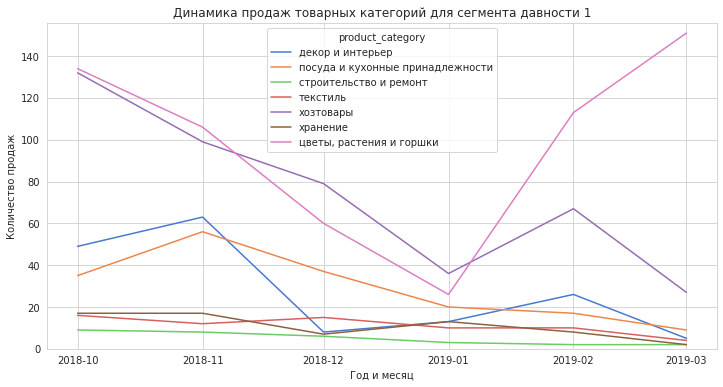

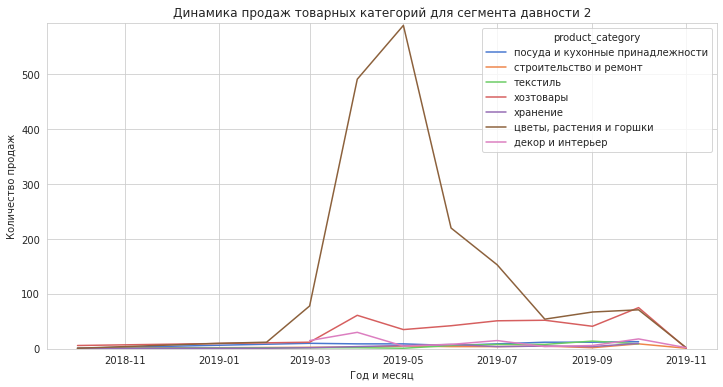

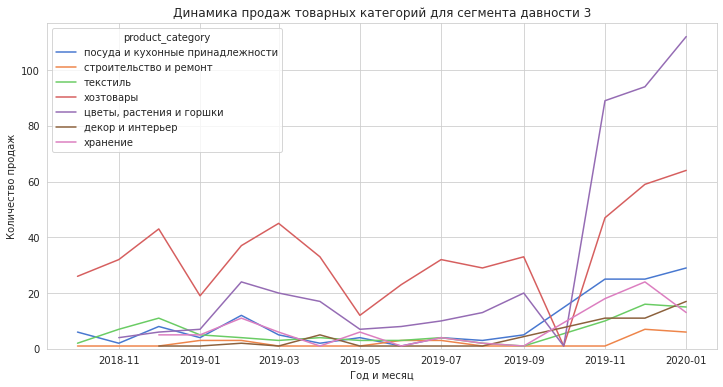

In [74]:
#графики динамики продаж наиболее продаваемых категорий товаров по сегментам клиентов
for i in data_filtered_rfm['recency'].unique():
    data_recency = (
        data_filtered_top_cat[data_filtered_top_cat['recency'] == i]
        .groupby(['month', 'product_category'], as_index=False)['product'].count()
    )
    plt.figure(figsize=(12, 6))
    ax = sns.lineplot(x='month', y='product', hue='product_category', data=data_recency)
    plt.title(f'Динамика продаж товарных категорий для сегмента давности {i}')
    plt.xlabel('Год и месяц')
    plt.ylabel('Количество продаж')
    ax.set_ylim(0, data_recency['product'].max() + 5)
    plt.show()

Наиболее ярко прослеживается сезонность продаж категории цветы, растения и горшки в сегменте относительно недавних клиентов – резкий рост в апреле-мае 2019 и спад к августу 2019. Покупка хозтоваров в этом сегменте была наиболее актуальна с апреля по октябрь 2019 с пиками в мае и октябре 2019. Декор и интерьер актуален в апреле 2019. По остальным категориям сезонности не прослеживается.

Ушедшие клиенты предпочитали снижать закупки товаров категории цветы, растения и горшки в декабре-январе, а до и после покупали эти товары достаточно активно. Категория хозтоваров в этом сегменте востребована до нового года, а в январе и  марте количество купленных хозтоваров снижалось. В ноябре в этом сегменте возрос спрос на категории декор и интерьер и посуда и кухонные принадлежности.

Интерес постоянных покупателей к хозтоварам, так же, как и к растениям, резко возрос и держался на высоком уровне с ноября 2019. При этом накануне роста продаж по этим категориям было резкое снижение в октябре 2019. Также пики продаж хозтоваров приходились на декабрь 2018, март, июль и август 2019. Пики продаж растений приходились на февраль и сентябрь 2019. С ноября 2019 виден рост продаж всех остальных популярных категорий товаров в сегменте, особенно посуда и кухонные принадлежности, хранение, текстиль, декор и интерьер. Текстиль, в целом, лучше продается в декабре (и 2018, и 2019). Категории хранение и посуда и кухонные принадлежности также относительно хорошо продавались в феврале 2019.

##### Динамика продаж категорий товаров по сегментам клиентов (клиенты с аномально дорогими заказами) 

Клиентов с аномально дорогими заказами не так много, поэтому при формировании специальных предложений для сегмента 2 к ним можно подходить персонализированно, опираясь на более популярные среди них категории, выявленные в пункте 4.2.3.2 и  на наблюдения по сезонности, составленные в предыдущем пункте.

##### Выводы по анализу категорий товаров по сегментам клиентов

1. Во всех сегментах чаще всего встречаются товары из категории цветы, растения и горшки и хозтовары:
- в сегменте ушедших клиентов эти категории почти наравне, но лидируют цветы, растения и горшки
- в сегменте постоянных клиентов эти категории тоже почти наравне, но лидируют хозтовары
- в сегменте относительно недавних клиентов сильно чаще по сравнению с другими категориями покупают товары из категории цветы, растения и горшки
2. Среди ушедших клиентов c аномально дорогими заказами наиболее популярными категориями были хозтовары и хранение. Среди относительно недавних – хозтовары и цветы, растения и горшки.
3. Сезонность:
- Относительно недавние клиенты:
    - цветы, растения и горшки – резкий рост в апреле-мае 2019 и спад к августу 2019
    - хозтовары наиболее актуальны с апреля по октябрь 2019 с пиками в мае и октябре 2019
    - декор и интерьер актуален в апреле 2019
    - по остальным категориям сезонности не прослеживается
- Ушедшие клиенты:
    - цветы, растения и горшки – снижение в декабре 2018-январе 2019, а до и после покупали эти товары достаточно активно
    - хозтовары востребованы до нового года, а в январе и марте 2019 количество купленных хозтоваров снижалось 
    - декор и интерьер и посуда и кухонные принадлежности – в ноябре 2018 возрос спрос
- Постоянные покупатели:
    - хозтовары – резко возрос и держался на высоком уровне с ноября 2019, при этом накануне роста продаж было резкое снижение в октябре 2019. Также пики продаж хозтоваров приходились на декабрь 2018, март, июль и август 2019. 
    - цветы, растения и горшки – резко возрос и держался на высоком уровне с ноября 2019, при этом накануне роста продаж было резкое снижение в октябре 2019. Также пики продаж растений приходились на февраль и сентябрь 2019. 
    - с ноября 2019 виден рост продаж всех остальных популярных категорий товаров в сегменте, особенно посуда и кухонные принадлежности, хранение, текстиль, декор и интерьер
    - текстиль, в целом, лучше продается в декабре (и 2018, и 2019)
    - категории хранение и посуда и кухонные принадлежности также относительно хорошо продавались в феврале 2019

Любопытно, что на фоне роста продаж в ноябре 2019 по всем популярным категориям в сегменте постоянных покупателей средний чек и ARPU в этом сегменте снижены.

<b>Рекомендация</b>: выяснить, проводились ли Черная пятница и Новогодняя распродажа, и если да, то не уронили ли средний чек и ARPU, снизив выручку.

## Проверка гипотез

Нам предстоит проверить гипотезы о равенстве средних значений двух генеральных совокупностей. Использовать будем критерий Стьюдента (t-тест), потому что:
- данные по сегментам пользователей не зависят друг от друга
- выборочные средние двух сравниваемых совокупностей распределены нормально (согласно центральной предельной теореме), т.к. размеры выборок достаточно большие
- о дисперсиях генеральных совокупностей нам ничего не известно, но на этот случай при проведении теста можно указать параметр `equal_var=False`

Для проверки гипотез используем отфильтрованные данные, т.к. аномалии могут исказить результаты.

Поскольку будем проверять две гипотезы на одном и том же наборе данных, используем поправку на множественную проверку гипотез. Выберем поправку Бонферрони. 

In [75]:
#уровень значимости 5% с поправкой на множественную проверку гипотез
alpha = 0.05 / 2

### Гипотеза о равенстве средних чеков у постоянных и ушедших клиентов

H0: средние чеки у постоянных и ушедших клиентов одинаковые.

H1: средние чеки у постоянных и ушедших клиентов разные.

Сначала получим выборки средних чеков по сегментам ушедших и постоянных клиентов.

In [76]:
#применение функции для подсчета среднего чека и сохранение данных в переменную
#ушедшие клиенты
average_bill_1 = get_avg_bill(data_filtered_rfm, parameter_type=['recency'], parameter='1')
#постоянные клиенты
average_bill_3 = get_avg_bill(data_filtered_rfm, parameter_type=['recency'], parameter='3')
print('Размер выборки сегмента ушедших клиентов =', len(average_bill_1))
print('Размер выборки сегмента постоянных клиентов =', len(average_bill_3))

Размер выборки сегмента ушедших клиентов = 928
Размер выборки сегмента постоянных клиентов = 1428


Выборки не одинакового размера, но это решается с помощью параметра `equal_var=False`.

In [77]:
#проводим тест для двух выборок, сохраняем результаты в переменную
results = st.ttest_ind(average_bill_1['revenue'], average_bill_3['revenue'], equal_var=False)
print('p-значение:', results.pvalue)
print('Среднее значение ср. чека для ушедших =', round(average_bill_1['revenue'].mean(), 2))
print('Среднее значение ср. чека для постоянных =', round(average_bill_3['revenue'].mean(), 2))

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: есть основания полагать, что средние чеки разные')
else:
    print('Не отвергаем нулевую гипотезу: нет оснований полагать, что средние чеки разные')

p-значение: 5.59917601574768e-10
Среднее значение ср. чека для ушедших = 1153.2
Среднее значение ср. чека для постоянных = 839.52
Отвергаем нулевую гипотезу: есть основания полагать, что средние чеки разные


<b>Вывод</b>: между ушедшими и постоянными клиентами есть статистически значимое различие по среднему чеку.

### Гипотеза о равенстве средней выручки с покупателя у постоянных и неактивных клиентов

H0: средняя выручка с покупателя (ARPU) у постоянных и неактивных клиентов одинакова.

H1: средняя выручка с покупателя (ARPU) у постоянных и неактивных клиентов разная.

Получим выборки средних чеков по сегментам неактивных и постоянных клиентов с помощью функции. 

In [78]:
#применение функции для подсчета ARPU и сохранение данных в переменную
#неактивные клиенты
arpu_2 = get_arpu(data_filtered_rfm, parameter_type=['recency'], parameter='2')
#постоянные клиенты
arpu_3 = get_arpu(data_filtered_rfm, parameter_type=['recency'], parameter='3')
print('Размер выборки сегмента неактивных клиентов =', len(arpu_2))
print('Размер выборки сегмента постоянных клиентов =', len(arpu_3))

Размер выборки сегмента неактивных клиентов = 947
Размер выборки сегмента постоянных клиентов = 726


При проверке гипотезы так же, как и в предыдущем тесте укажем значение параметра `equal_var=False`.

In [79]:
#проводим тест для двух выборок, сохраняем результаты в переменную
results_arpu = st.ttest_ind(arpu_2['revenue'], arpu_3['revenue'], equal_var=False)
print('p-значение:', results_arpu.pvalue)
print('Среднее значение ARPU для неактивных =', round(arpu_2['revenue'].mean(), 2))
print('Среднее значение ARPU для постоянных =', round(arpu_3['revenue'].mean(), 2))

if (results_arpu.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: есть основания полагать, что ARPU разная')
else:
    print('Не отвергаем нулевую гипотезу: нет оснований полагать, что ARPU разная')

p-значение: 1.0024495500596628e-07
Среднее значение ARPU для неактивных = 1221.82
Среднее значение ARPU для постоянных = 1651.29
Отвергаем нулевую гипотезу: есть основания полагать, что ARPU разная


<b>Вывод</b>: между неактивными и постоянными клиентами есть статистически значимое различие по средней выручке с покупателя.

## Общий вывод

<b>Что сделано</b>:
- предобработаны данные
- проведен исследовательский анализ данных
- проанализированы основные показатели магазина
- проведена сегментация клиентов с помощью RFM-анализа
- проведен анализ сегментов клиентов
- проведен анализ категорий товаров по сегментам клиентов
- проверены гипотезы о равенстве средних чеков у постоянных и ушедших клиентов и о равенстве средней выручки с покупателя у постоянных и неактивных клиентов
- разработаны рекомендации по сегментам покупателей

<b>Выводы по основным показателям магазина</b>:
1. Имеет место постепенное <b>снижение выручки</b>. Ноябрь 2019 прошел наиболее неудачно, здесь наблюдаем минимум за весь рассматриваемый период. При этом в ноябре 2018 резкого снижения не было. Снижение выручки в январе похоже на сезонное явление — снижения есть и в 2019 и в 2020.
2. <b>Средний чек</b> также, как и выручка постепенно снижается. При этом с ноября 2019 наблюдаются минимальные значения за весь период. Можно предположить, что снижение выручки в ноябре 2019 может быть обусловлено снижением среднего чека.
3. <b>Средняя выручка с покупателя</b> просела с ноября 2019. С учетом снижения среднего чека можно сказать, что покупатели стали тратить меньшие суммы, вследствие чего снизилась выручка.

<b>Выводы по анализу сегментов клиентов</b>:

1. По всем сегментам наблюдаем тенденцию к <b>снижению среднего чека</b>. Наиболее заметное снижение происходит с октября 2019. Это коррелирует с общей динамикой выручки и среднего чека.

- <i>Ушедшие клиенты</i>: максимум – ноябрь 2018, минимум – март 2019. После пикового ноября 2018 с декабря 2018 начался тренд на снижение.

- <i>Неактивные клиенты</i>: максимум – в январе 2019 и заметен небольшой пик в мае, минимум – ноябрь 2019 и небольшая просадка в феврале 2019. Также можно заметить насколько сильно отличается ноябрь 2018, который являлся продолжением восходящего тренда, от ноября 2019, где наблюдается резкое снижение.

- <i>Постоянные клиенты</i>: максимум – в июне 2019, минимум – октябрь, ноябрь и январь 2019. При этом, если сравнивать с прошлым годом, в октябре и ноябре 2018 значение было высоким.


2. <b>Средняя выручка на пользователя</b> так же имеет тенденцию к снижению по каждому сегменту:

- <i>Ушедшие клиенты</i>: несмотря на нисходящую динамику, показатель ARPU был достаточно высоким. Это повод подумать о способах возвращения этого сегмента клиентов.

- <i>Неактивные клиенты</i>: ARPU большую часть времени держалась на более высоком уровне, чем у постоянных клиентов. Пиковые значения средней выручки на пользователя приходятся на январь 2019 и май 2019. Минимальное значение наблюдаем в ноябре 2019, при чем снижение произошло достаточно резко.

- <i>Постоянные клиенты</i>: ARPU была наиболее высокой в июне 2019. Минимальное значение наблюдаем в октябре 2019, после чего уровень хоть и повысился, но не восстановился до прежних значений.

<b>Выводы по анализу категорий товаров по сегментам клиентов</b>:
1. Во всех сегментах чаще всего встречаются товары из категории цветы, растения и горшки и хозтовары:
- в сегменте <i>ушедших</i> клиентов эти категории почти наравне, но лидируют цветы, растения и горшки
- в сегменте <i>постоянных</i> клиентов эти категории тоже почти наравне, но лидируют хозтовары
- в сегменте <i>относительно недавних</i> клиентов сильно чаще по сравнению с другими категориями покупают товары из категории цветы, растения и горшки
2. Среди ушедших клиентов c аномально дорогими заказами наиболее популярными категориями были хозтовары и хранение. Среди относительно недавних – хозтовары и цветы, растения и горшки.
3. Сезонность:
- <i>Ушедшие клиенты</i>:
    - цветы, растения и горшки – снижение в декабре 2018-январе 2019, а до и после покупали эти товары достаточно активно
    - хозтовары востребованы до нового года, а в январе и марте 2019 количество купленных хозтоваров снижалось 
    - декор и интерьер и посуда и кухонные принадлежности – в ноябре 2018 возрос спрос

- <i>Относительно недавние клиенты</i>:
    - цветы, растения и горшки – резкий рост в апреле-мае 2019 и спад к августу 2019
    - хозтовары наиболее актуальны с апреля по октябрь 2019 с пиками в мае и октябре 2019
    - декор и интерьер актуален в апреле 2019
    - по остальным категориям сезонности не прослеживается

- <i>Постоянные покупатели</i>:
    - хозтовары – резко возрос и держался на высоком уровне с ноября 2019, при этом накануне роста продаж было резкое снижение в октябре 2019. Также пики продаж хозтоваров приходились на декабрь 2018, март, июль и август 2019. 
    - цветы, растения и горшки – резко возрос и держался на высоком уровне с ноября 2019, при этом накануне роста продаж было резкое снижение в октябре 2019. Также пики продаж растений приходились на февраль и сентябрь 2019. 
    - с ноября 2019 виден рост продаж всех остальных популярных категорий товаров в сегменте, особенно посуда и кухонные принадлежности, хранение, текстиль, декор и интерьер
    - текстиль, в целом, лучше продается в декабре (и 2018, и 2019)
    - категории хранение и посуда и кухонные принадлежности также относительно хорошо продавались в феврале 2019

Любопытно, что на фоне роста продаж в ноябре 2019 по всем популярным категориям в сегменте постоянных покупателей средний чек и ARPU в этом сегменте снижены.

<b>Выводы по проверке гипотез</b>

1) Гипотеза о равенстве средних чеков у постоянных и ушедших клиентов

    H0: средние чеки у постоянных и ушедших клиентов одинаковые.

    H1: средние чеки у постоянных и ушедших клиентов разные.

<b>Вывод</b>: между ушедшими и постоянными клиентами есть статистически значимое различие по среднему чеку.

2) Гипотеза о равенстве средней выручки с покупателя у постоянных и неактивных клиентов

    H0: средняя выручка с покупателя (ARPU) у постоянных и неактивных клиентов одинакова.

    H1: средняя выручка с покупателя (ARPU) у постоянных и неактивных клиентов разная.
    
<b>Вывод</b>: между неактивными и постоянными клиентами есть статистически значимое различие по средней выручке с покупателя.

<b>Рекомендации по рекламной рассылке</b>: 
- Сегмент <i>ушедших клиентов</i>:
    - в феврале и в октябре сделать рассылку с предложениями по категориям хозтовары, цветы, растения и горшки
    - в мае можно снова протестировать рассылку по категории цветы, растения и горшки
    - в ноябре разослать предложения на категории декор и интерьер, посуда и кухонные принадлежности
- Сегмент <i>относительно недавних клиентов</i>:
    - в апреле-мае сделать рассылку с предложениями по категории цветы, растения и горшки
    - также в апреле разослать предложения на декор и интерьер
    - в мае и октябре предложить хозтовары
- Сегмент <i>постоянных клиентов</i>: 
    - в марте, июле, сентябре, ноябре, декабре сделать рассылку с хозтоварами (попробовать с помощью акций поднять средний чек)
    - в феврале, сентябре и ноябре разослать предложения на цветы, растения и горшки
    - в феврале и ноябре сделать рассылку с посудой и кухонными принадлежностями
    - в феврале и декабре сделать рассылку с предложениями на категорию хранение
    - в декабре сделать рассылку с предложениями на текстиль

<b>Дополнительные рекомендации</b>:
- выяснить, проводились ли Черная пятница и Новогодняя распродажа в ноябре и декабре 2019, и если да, то узнать, не уронили ли средний чек и ARPU, снизив выручку, и почему так произошло